In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
print(train.head())

   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyr

In [3]:
print(train.shape)
print(test.shape)

(7352, 563)
(2947, 563)


#### Checking null values 
* if null value present in any columns show only that column
* select only the object type columns
* Check the unique value of the object type column

In [4]:
train.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [5]:
train.isnull().any().sum()

0

In [6]:
cols  = train.select_dtypes(include='object')
print(cols.head())
uni = cols['Activity'].unique()
print(uni)

   Activity
0  STANDING
1  STANDING
2  STANDING
3  STANDING
4  STANDING
['STANDING' 'SITTING' 'LAYING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']


In [7]:
train['Activity'].value_counts()

Activity
LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: count, dtype: int64

#### Label Encoding
* encode the categorical value to numerical (int) using LabelEncoder()
* ex: 
     * LAYING - 0, Standing -1

In [8]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(train['Activity'])
train['Activity'] = encoded_labels
train.head()
encoded_labels = encoder.fit_transform(test['Activity'])
test['Activity'] = encoded_labels

#### Scaling
* if the dataset numerical values are far different then use StandardScaler to scaling the data in range [-1 to 1].
* In this dataset , the values ate already scaled one.

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

standard_scaler = StandardScaler()
scaled_train = standard_scaler.fit_transform(train)
scaled_train = standard_scaler.fit_transform(train)
scaled_train = pd.DataFrame(scaled_train)

pca = PCA(n_components = 200)
trained_pca = pca.fit_transform(scaled_train)
trained_pca = pd.DataFrame(trained_pca)

x_train = trained_pca.iloc[:,:-1]
y_train = trained_pca.iloc[:,-1]
x_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1]

In [10]:
x_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1]
print(y_train)
x_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1]

0       2
1       2
2       2
3       2
4       2
       ..
7347    5
7348    5
7349    5
7350    5
7351    5
Name: Activity, Length: 7352, dtype: int32


standard_scaler = StandardScaler()
scaled_train = standard_scaler.fit_transform(x_train)
scaled_train = standard_scaler.fit_transform(x_train)
x_train = pd.DataFrame(scaled_train)
print(x_train)

## Logistic Regression

In [11]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

C:\Users\rkaus\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
y_pred_lr=lr.predict(x_test)

In [18]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
report_lr = classification_report(y_test,y_pred_lr)
print(report_lr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.96      0.87      0.91       491
           2       0.89      0.97      0.93       532
           3       0.94      0.98      0.96       496
           4       0.97      0.96      0.97       420
           5       0.96      0.93      0.95       471

    accuracy                           0.95      2947
   macro avg       0.95      0.95      0.95      2947
weighted avg       0.95      0.95      0.95      2947



In [22]:
accuracy_lr = accuracy_score(y_test,y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='weighted')
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')

## Random Forest

### Gini index

In [14]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()#default iterations = 100, criterion = 'gini'
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [17]:
y_pred = rfc.predict(x_test)
report_rfc = classification_report(y_test,y_pred)
print(report_rfc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.92      0.89      0.90       491
           2       0.90      0.92      0.91       532
           3       0.90      0.96      0.93       496
           4       0.95      0.85      0.90       420
           5       0.88      0.91      0.90       471

    accuracy                           0.92      2947
   macro avg       0.93      0.92      0.92      2947
weighted avg       0.93      0.92      0.92      2947



In [20]:
accuracy_rfc = accuracy_score(y_test,y_pred)
precision_rfc = precision_score(y_test, y_pred, average='weighted')
recall_rfc = recall_score(y_test, y_pred, average='weighted')
f1_rfc = f1_score(y_test, y_pred, average='weighted')

### Entropy

In [27]:
from sklearn.ensemble import RandomForestClassifier
rfc_e = RandomForestClassifier(n_estimators = 100,criterion = 'entropy')#default n_estimators = 100, criterion = 'gini'
rfc_e.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy')

In [28]:
y_pred_e = rfc_e.predict(x_test)
report_rfc_e = classification_report(y_test,y_pred_e)
print(report_rfc_e)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.92      0.88      0.90       491
           2       0.90      0.93      0.91       532
           3       0.89      0.96      0.92       496
           4       0.96      0.84      0.90       420
           5       0.89      0.90      0.90       471

    accuracy                           0.92      2947
   macro avg       0.93      0.92      0.92      2947
weighted avg       0.93      0.92      0.92      2947



In [29]:
accuracy_rfc_e = accuracy_score(y_test,y_pred_e)
precision_rfc_e = precision_score(y_test, y_pred_e, average='weighted')
recall_rfc_e = recall_score(y_test, y_pred_e, average='weighted')
f1_rfc_e = f1_score(y_test, y_pred_e, average='weighted')

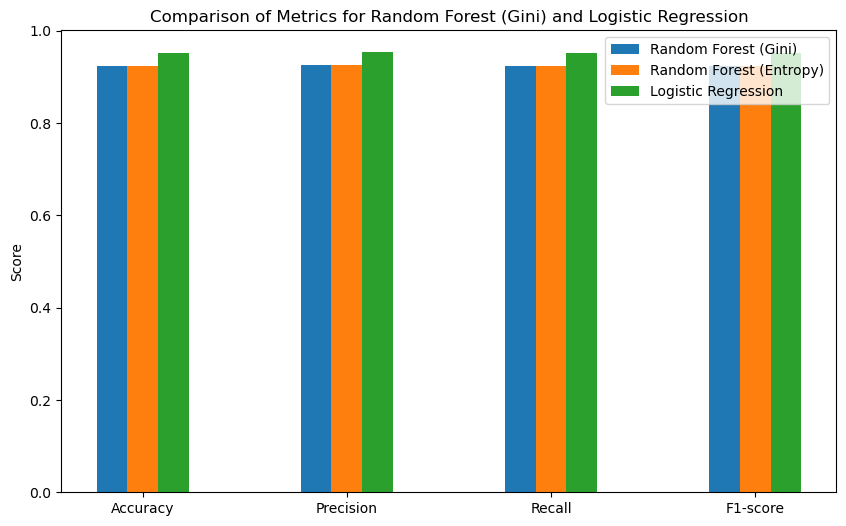

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Define data
labels = ['Accuracy', 'Precision', 'Recall', 'F1-score']
scores_gini = [accuracy_rfc, precision_rfc, recall_rfc, f1_rfc]
scores_entropy = [accuracy_rfc_e, precision_rfc_e, recall_rfc_e, f1_rfc_e]
scores_lr = [accuracy_lr, precision_lr, recall_lr, f1_lr]

# Define positions for bars
x = np.arange(len(labels))
width = 0.15  # Width of the bars

# Create grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, scores_gini, width, label='Random Forest (Gini)')
rects2 = ax.bar(x , scores_entropy, width, label='Random Forest (Entropy)')
rects3 = ax.bar(x + width, scores_lr, width, label='Logistic Regression')
# Add labels, title, and legend
ax.set_ylabel('Score')
ax.set_title('Comparison of Metrics for Random Forest (Gini) and Logistic Regression')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc = 0)


plt.show()
